In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

X.shape= (2, 500)


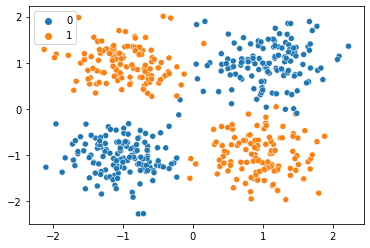

In [ ]:
# dataset size
m = 500

# generate random samples
X = 2.0 * np.random.randint(0,2,size=(2,m)) - 1.0
y = 1 * np.logical_xor(X[0]>0, X[1]>0)

# add noise
X += 0.4 * np.random.randn(2,m)

print ("X.shape=",X.shape)

sns.scatterplot(x = X[0],y = X[1],hue = y);

## Forward propagation

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z) * (1-sigmoid(z))

In [ ]:
def predict(W1,B1,W2,B2,X):
  A0=X
  
  Z1 = np.dot (W1,A0) + B1
  A1 = sigmoid(Z1)

  Z2 = np.dot (W2,A1) + B2
  A2 = sigmoid(Z2)

  y_hat = A2
  
  return y_hat,A1,Z1,A2,Z2

## Cost function

In [ ]:
def J(y,y_hat):
  m = y.shape[0]
  J = (1/m) * np.sum(- y * np.log(y_hat) - (1-y) * np.log(1-y_hat))
  return J

In [ ]:
def accuracy(y,y_hat):
  return np.sum(y == (y_hat > 0.5))/len(y)  

## Network parameters

In [ ]:
hidden_layer_size = 4
learning_rate = 0.01
n_iterations = 50000

# Initialize

In [ ]:
W1 = np.random.randn(hidden_layer_size,X.shape[0])
B1 = np.random.randn(hidden_layer_size,1)

W2 = np.random.randn(1,hidden_layer_size)
B2 = np.random.randn(1,1)

print ("W1.shape=",W1.shape)
print ("B1.shape=",B1.shape)
print ("W2.shape=",W2.shape)
print ("B2.shape=",B2.shape)

W1.shape= (4, 2)
B1.shape= (4, 1)
W2.shape= (1, 4)
B2.shape= (1, 1)


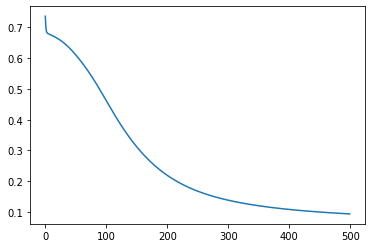

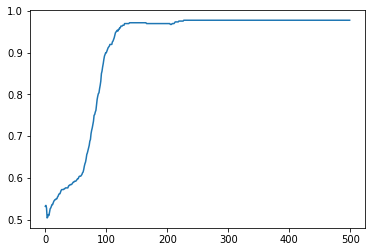

In [ ]:
j_lst=[]
acc_lst=[]

for i in range(n_iterations):
  y_hat,A1,Z1,A2,Z2 = predict (W1,B1,W2,B2,X)
  
  dZ2 = y_hat - y
  dW2 = (1/m) * dZ2 @ A1.T
  dB2 = (1/m) * np.sum(dZ2,axis=1,keepdims = True)

  dZ1 = W2.T @ dZ2 * sigmoid_prime(Z1)
  dW1 = (1/m) * dZ1 @ X.T
  dB1 = (1/m) * np.sum(dZ1,axis=1,keepdims = True)

  W1 -= dW1 * learning_rate
  B1 -= dB1 * learning_rate
  W2 -= dW2 * learning_rate
  B2 -= dB2 * learning_rate

  if (i%100) == 0:
    j_lst.append(J(y,y_hat))
    acc_lst.append(accuracy(y, y_hat))

plt.plot(j_lst)
plt.show()
plt.plot(acc_lst)

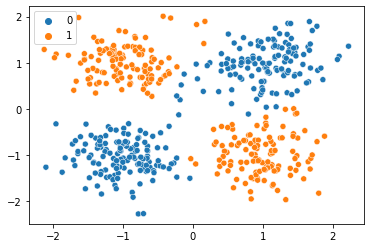

In [ ]:
y_hat = 1 * (predict(W1,B1,W2,B2,X)[0][0] > 0.5)
sns.scatterplot(x = X[0],y = X[1],hue = y_hat);